# Red Wine Quality Prediction

Prediction for the quality of any product is an interesting matter to know about the product in detail and everyone interested to know more about the product quality and their contents. For this here we take one example of wine quality by using Machine Learning in Python.

These datasets can be viewed as classification tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Input variables (based on physicochemical tests):

1) fixed acidity

2) volatile acidity

3) citric acid

4) residual sugar

5) chlorides

6) free sulfur dioxide

7) total sulfur dioxide

8) density

9) pH

10) sulphates

11) alcohol Output variable (based on sensory data):

12) quality (score between 3 and 8)

Our goal is to make a machine learning model that can predict the quality of wine based on the input variable (features) given above.

Dataset :- https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [ ]:
#import libraries
import numpy as np #2 perform mathematical operations on arrays
import pandas as pd #for data analysis
import matplotlib.pyplot as plt #for making plots in graphs
import seaborn as sns #statistical graphics

from sklearn.ensemble import RandomForestClassifier #handle the missing values& maintain the accuracy of a large proportion of data
from sklearn.model_selection import train_test_split #measure the accuracy of the model
from sklearn.metrics import accuracy_score #measure model performance
from sklearn.model_selection import cross_val_score #statistical method used to estimate the performance (or accuracy) of machine learning models

Data Collection

In [ ]:
#load the dataset 2 pandas data frame for manupulating the data
data = pd.read_csv('winequality-red.csv', encoding = 'latin-1')

#now v hv 2 replace null values with null string otherwise it will show errors
#v will store this in variable claaed "data"
wine_dataset = data.where((pd.notnull(data)), '')

In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

**Observations:**
* Dataset comprises 1599 observations(rows) and 12 features(columns).
* Out of the 12, one is the target variable and rest 11 are input variables.





In [ ]:
#lets c sample of this dataset in pandas data frame
#first 10 rows of the dataset
wine_dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
#last 10 rows of the dataset
wine_dataset.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
#data preprocessing 2 check whether if there r any empty values
#checking the number of missing values in each column
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#now lets c statistical values of data
#Basic Descriptive statistics on the data
wine_dataset.describe(include = "all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observations:**

* Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. For example, a data set includes values: 30, 31, 32, and 2. The mean value (23.75), which is lower than the median of the data (30.5), is greatly affected by the extreme data point(2). 
* There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile) 
* Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset. 

### Counterplot
Showing the total count of quality in counterplot.

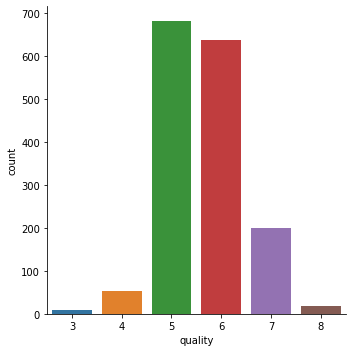

In [ ]:
#number of values for each quality
sns.catplot(x = 'quality', data = wine_dataset, kind = 'count')

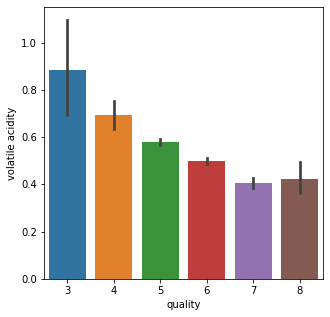

In [ ]:
#volatile acidity vs Quality
plot = plt.figure(figsize = (5, 5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataset)

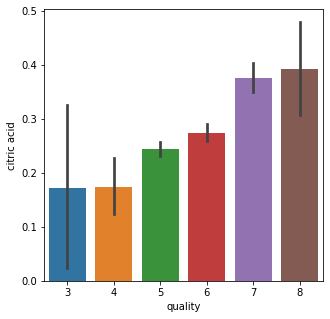

In [ ]:
#citric acid vs Quality
plot = plt.figure(figsize = (5, 5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataset)

Correlation

1. Positive Correlation (directly proportional)
2. Negative Correlation (inversly proportional)

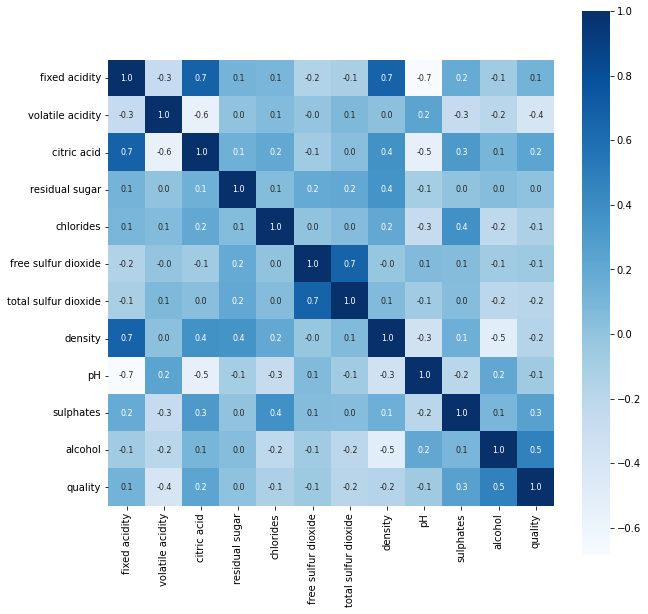

In [ ]:
#finding the correlation b/w the data
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize = (10, 10))
sns.heatmap(wine_dataset.corr(), cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

#wine_dataset.corr() --> correlation of the wine data
#cbar --> Color bar(gives how much corelated the values r)
#square --> want all the valuues 2 in the square form
#fmt = .1f --> v hv 1 floating pt values, if u want 2 thn u can give .2f
#annot --> annotations dey r ntg but side values(fixed acidity, citric acid, ......)
#annot_kws --> size & color of the annotation text & maps 

Data Preprocessing

In [ ]:
#separate the data and Label
#assigning data(fixed acidity, volatile acidity, ......, alcohol) as x
#v r droping the quality column
#as v r droping the column v need 2 mention axis = 1
X = wine_dataset.drop('quality', axis = 1)

#assigning label(quality) as y
#v r binarize this values (i want this quality 2 b 2 values --> 0 / 1)
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [ ]:
print(X) #printing data(fixed acidity, volatile acidity, ......, alcohol)
print("---------------------------------------------------------------------------------------------")
print(Y) #printing label(quality)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Train & Test Split

In [ ]:
#spliting the dataset in2 Training & Testing
#test size --> 2 specify the percentage of test data needed ==> 0.2 ==> 20%
#random state --> specific split of data each value of random_state splits the data differently, v can put any state v want
#v need 2 specify the same random_state everytym if v want 2 split the data the same way everytym
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
#lets c how many examples r there for each cases
#checking dimensions of data
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [ ]:
#lets c how many examples r there for each cases
#checking dimensions of label
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


## Our data is ready to be applied a machine learning algorithm

Model Training:

# Random Forest Classifier

In [ ]:
#loading RandomForestClassifier 2 the variable "model"
#training the RandomForestClassifier Model with Training Data
#v r fitting the data x_train, y_train 2 the model which is the RandomForestClassifier model, so the model is trained with the data
model = RandomForestClassifier().fit(X_train, Y_train)

## **Evaluation of the model**

## Predicting seen data with our RandomForestClassifier ML model

In [ ]:
#prediction on train_data
X_train_prediction = model.predict(X_train)
X_train_prediction

array([1, 0, 0, ..., 0, 1, 0])

## Predicting unseen data with our RandomForestClassifier ML model

In [ ]:
#prediction on test_data
X_test_prediction = model.predict(X_test)
X_test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## Checking Accuracy of RandomForestClassifier ML model with training data and testing data

In [ ]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data 
#prediction on train_data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
#print the accuracy_score on training data
print('Accuracy on Training data : ', training_data_accuracy)

#print the accuracy_score on testing data
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9375


## RandomForestClassifier ML model Score

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
model.score(X_train, Y_train)

1.0

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
model.score(X_test, Y_test)

0.9375

Lets Cross Validate and Check how the model performs.

In [ ]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(model, X, Y, cv = 5))

[0.875      0.853125   0.871875   0.859375   0.87774295]


Building a Predictive System

In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Summary
From above data engineering and machine learning (classification) techniques we can conclude that:

We have chosen not to remove outliers and extract the more relavant features form out dataset – as we were looking for accuracy to minute levels, not just some approximation (high quality wine may have very rare composition from other average quality wines)
Random Forrest Classification model gave the best accuracy and can be considered as a good model for predictiong the quality of wine for this problem.
However other models like Logisgic Regression, KNN and SVC also have comparable score to Random Forrest and may also be used to predict quality of wine.
Naive Bayes model gave the least accuracy, which can be considered bad model to predict the quality of fine.
Performance tuning using methods like Grid Search, etc. can be done to improve the accuracy of these models. So, accuracy of these models will improve and we might get another best model for our problem.
We might(will) get different results if we remove outliers and consider feature extraction.
From above data engineering and machine learning (classification) techniques we can conclude that:

We have chosen not to remove outliers and extract the more relavant features form out dataset – as we were looking for accuracy to minute levels, not just some approximation (high quality wine may have very rare composition from other average quality wines)
Random Forrest Classification model gave the best accuracy and can be considered as a good model for predictiong the quality of wine for this problem.
However other models like Logisgic Regression, KNN and SVC also have comparable score to Random Forrest and may also be used to predict quality of wine.
Naive Bayes model gave the least accuracy, which can be considered bad model to predict the quality of fine.
Performance tuning using methods like Grid Search, etc. can be done to improve the accuracy of these models. So, accuracy of these models will improve and we might get another best model for our problem.
We might(will) get different results if we remove outliers and consider feature extraction.

# Saving the trained model

In [ ]:
import pickle #keeps track of the objects it has already serialized ==> allows saving model in very little tym

In [ ]:
#save the model trained in the file "trained_model.sav" to a new file called "winequality_trained_model.pkl"
filename = 'winequality_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('winequality_trained_model.sav', 'rb'))

In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
